In [99]:
import pandas as pd

test = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo_19052025/data/processed/data_snapshots.csv')
test['lane_stopping_machine'] = test.apply(lambda row: row['MerSubNumber'] if row['MerNumber'] >= 400 else row['lane_stopping_machine'], axis=1)
test.head(5)

,index,MerDate,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Error/warnings,lane_stopping_machine,snapshot,time_delta
0,0,2025-01-30 10:21:42,11897186,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,12.0,1,0 days 00:04:02
1,1,2025-01-30 10:21:56,11897187,23,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0,12.0,1,0 days 00:04:02
2,2,2025-01-30 10:21:56,11897188,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,12.0,1,0 days 00:04:02
3,3,2025-01-30 10:21:57,11897189,23,460,12,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,23_460_0.0_0.0,12.0,1,0 days 00:04:02
4,4,2025-01-30 10:21:57,11897190,21,460,12,1.0,22.0,41.0,NaN,NaN,4620,NaN,0,0,0,21_460_22.0_41.0,12.0,1,0 days 00:04:02


In [2]:
test['lane_stopping_machine'].unique()

array([12., nan,  7., 16.,  4.,  8., 10., 17.,  0., 14.,  9., 13., 11.,
       15.,  3., 18.,  5.,  6.,  2.,  1.])

# We need to following columns for a new experiment

- number of cumulative errors during window
- number of cumulative warnings during window
- sum per error type during window
- time per seconds during window
- time without date
- sum per warning type during window 
- classification of the model in 5 parts: start, stop, normal, ascending stop/jam, decreasing stop/jam

# Steps to take
- we want to make the columns correct per window
- we want to label the data according to the classification parts

Column fixing

In [64]:
selected_columns = test[['MerType', 'MerDate', 'MerNumber', 'MerSubNumber','snapshot', 'lane_stopping_machine']] 
selected_columns['is_error'] = (selected_columns['MerType'] == 21).astype(int)
selected_columns['is_warning'] = (selected_columns['MerType'] == 22).astype(int)
selected_columns['is_solved'] = (selected_columns['MerType'] == 23).astype(int)
selected_columns['is_lowered'] = (selected_columns['MerType'] == 24).astype(int)
selected_columns['stop'] = selected_columns.apply(lambda row: row['MerSubNumber'] if row['MerType'] == 8 else 1, axis=1)

selected_columns.head()

/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_34270/684338821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['is_error'] = (selected_columns['MerType'] == 21).astype(int)
/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_34270/684338821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['is_warning'] = (selected_columns['MerType'] == 22).astype(int)
/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_34270/684338821.py:4: SettingWithCopyWa

,MerType,MerDate,MerNumber,MerSubNumber,snapshot,lane_stopping_machine,is_error,is_warning,is_solved,is_lowered,stop
0,21,2025-01-30 10:21:42,460,12,1,12.0,1,0,0,0,1
1,23,2025-01-30 10:21:56,460,12,1,12.0,0,0,1,0,1
2,21,2025-01-30 10:21:56,460,12,1,12.0,1,0,0,0,1
3,23,2025-01-30 10:21:57,460,12,1,12.0,0,0,1,0,1
4,21,2025-01-30 10:21:57,460,12,1,12.0,1,0,0,0,1


In [59]:
# Concatenating the one-hot encoded columns with the original dataframe
onehot_encoded_mernumber = pd.get_dummies(selected_columns['MerNumber'], prefix='MerNumber').astype(int)
test_with_onehot = pd.concat([selected_columns, onehot_encoded_mernumber], axis=1)

onehot_selected = test_with_onehot.drop(columns=['MerType', 'MerNumber'])
onehot_selected.head()


,MerDate,MerSubNumber,snapshot,lane_stopping_machine,is_error,is_warning,is_solved,is_lowered,stop,MerNumber_0,...,MerNumber_458,MerNumber_460,MerNumber_461,MerNumber_462,MerNumber_470,MerNumber_480,MerNumber_481,MerNumber_483,MerNumber_490,MerNumber_511
0,2025-01-30 10:21:42,12,1,12.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2025-01-30 10:21:56,12,1,12.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2025-01-30 10:21:56,12,1,12.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2025-01-30 10:21:57,12,1,12.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2025-01-30 10:21:57,12,1,12.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
onehot_selected['is_error_cumulative'] = onehot_selected['is_error'].cumsum()
onehot_selected['is_warning_cumulative'] = onehot_selected['is_warning'].cumsum()
onehot_selected['MerDate'] = onehot_selected['MerDate'].astype('datetime64[s]')
onehot_selected['time'] = onehot_selected['MerDate'].dt.time
onehot_selected['time'] = onehot_selected['time'].astype(str)

onehot_selected.head()

,MerDate,MerSubNumber,snapshot,lane_stopping_machine,is_error,is_warning,is_solved,is_lowered,stop,MerNumber_0,...,MerNumber_462,MerNumber_470,MerNumber_480,MerNumber_481,MerNumber_483,MerNumber_490,MerNumber_511,is_error_cumulative,is_warning_cumulative,time
0,2025-01-30 10:21:42,12,1,12.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10:21:42
1,2025-01-30 10:21:56,12,1,12.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,10:21:56
2,2025-01-30 10:21:56,12,1,12.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,10:21:56
3,2025-01-30 10:21:57,12,1,12.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2,0,10:21:57
4,2025-01-30 10:21:57,12,1,12.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,10:21:57


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

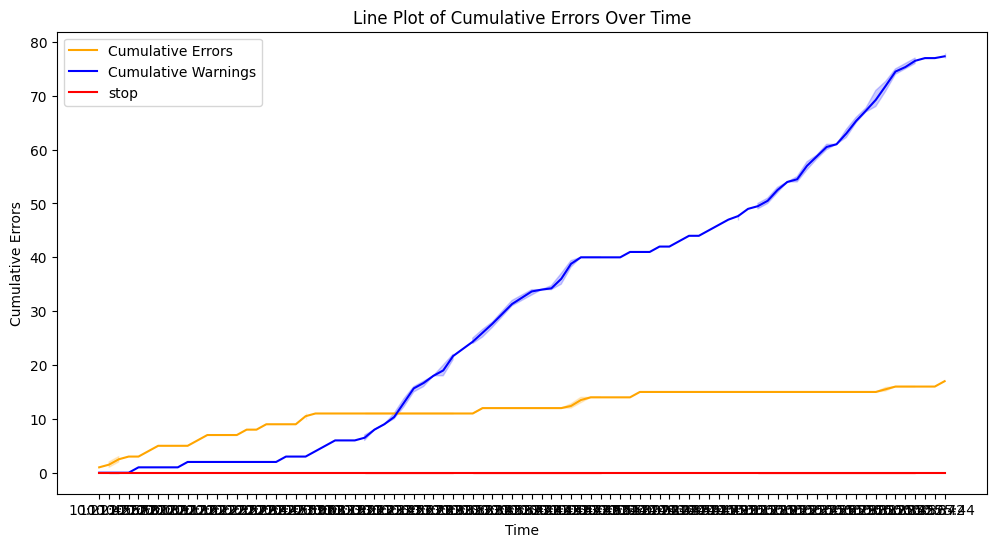

In [61]:
df = onehot_selected[onehot_selected['snapshot'] == 1]


plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='time', y='is_error_cumulative', label='Cumulative Errors', color='orange')
sns.lineplot(data=df, x='time', y='is_warning_cumulative', label='Cumulative Warnings', color='blue')
sns.lineplot(data=df, x='time', y='stop', label='stop', color='red')

plt.title('Line Plot of Cumulative Errors Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Errors')
plt.legend()
plt.show()

In [ ]:
# Aggregating columns per snapshot
aggregated_data = onehot_selected.groupby('snapshot').agg({
    'is_error': 'sum',
    'is_warning': 'sum',
    'is_solved': 'sum',
    'is_lowered': 'sum',
    'MerDate': 'count'
}).rename(columns={'is_error': 'total_errors', 'is_warning': 'total_warnings', 'MerDate': 'total_events'}).reset_index()

aggregated_data = aggregated_data[aggregated_data['total_events'] > 1000]

In [28]:
print(aggregated_data['snapshot'].max())

24805


In [48]:

def plot_this(df):
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='snapshot', y='total_errors', label='Total Errors', color='red')
    sns.lineplot(data=df, x='snapshot', y='total_warnings', label='Total Warnings', color='orange')
    sns.lineplot(data=df, x='snapshot', y='is_solved', label='Total Solved', color='blue')
    sns.lineplot(data=df, x='snapshot', y='total_events', label='Total Events', color='green')


    plt.title('Line Plot of Total Errors and Warnings by Snapshot')
    plt.xlabel('Snapshot')
    plt.ylabel('Count')
    plt.legend()
    plt.show()


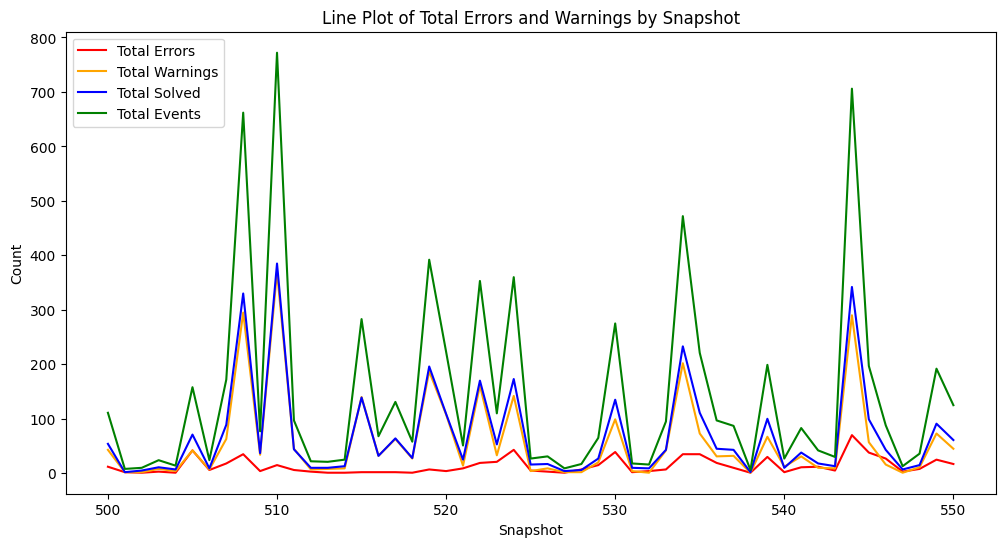

In [68]:
filtered_data = aggregated_data[(aggregated_data['snapshot'] >= 500)&(aggregated_data['snapshot'] <= 550)]

plot_this(filtered_data)

# We want snapshots in the following fases: start, stop, normal, ascending stop/jam, decreasing stop/jam

at index 184 there is a stop and at 188 a start. At index 372 there is a stop and at 377 a start.

In [57]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [84]:
import pandas as pd

data = pd.read_csv('/Users/tyco/Desktop/MADS/sanovo/data/raw/HSTMachineError.csv')
full_df = data.iloc[1:377]
# full_df = data.iloc[1:1000]


In [85]:
full_df['is_error'] = (full_df['MerType'] == 21).astype(int)
full_df['is_warning'] = (full_df['MerType'] == 22).astype(int)
full_df['is_solved'] = (full_df['MerType'] == 23).astype(int)
full_df['is_lowered'] = (full_df['MerType'] == 24).astype(int)
full_df['stop'] = full_df.apply(lambda row: row['MerNumber'] * 100 if row['MerType'] == 8 else 100, axis=1)
full_df['is_error_cumulative'] = full_df['is_error'].cumsum()
full_df['is_warning_cumulative'] = full_df['is_warning'].cumsum()

full_df = full_df[['MerDate', 'MerNumber', 'MerSubNumber','is_error','is_error_cumulative','is_warning','is_warning_cumulative','is_solved','is_lowered','stop']] 
full_df.head()

/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_34270/3429815386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['is_error'] = (full_df['MerType'] == 21).astype(int)
/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_34270/3429815386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['is_warning'] = (full_df['MerType'] == 22).astype(int)
/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_34270/3429815386.py:3: SettingWithCopyWarning: 
A value is trying to be s

,MerDate,MerNumber,MerSubNumber,is_error,is_error_cumulative,is_warning,is_warning_cumulative,is_solved,is_lowered,stop
1,2025-01-30 10:21:42.000,460,12,1,1,0,0,0,0,100
2,2025-01-30 10:21:56.000,460,12,0,1,0,0,1,0,100
3,2025-01-30 10:21:56.000,460,12,1,2,0,0,0,0,100
4,2025-01-30 10:21:57.000,460,12,0,2,0,0,1,0,100
5,2025-01-30 10:21:57.000,460,12,1,3,0,0,0,0,100


/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_34270/1745316734.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=full_df, x='MerDate', y='is_error_cumulative', label='Cumulative Errors', color='orange', ci=None)
/var/folders/pt/00xl4yzd64s0vbx9w9tzh94m0000gn/T/ipykernel_34270/1745316734.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=full_df, x='MerDate', y='is_warning_cumulative', label='Cumulative Warnings', color='blue', ci=None)


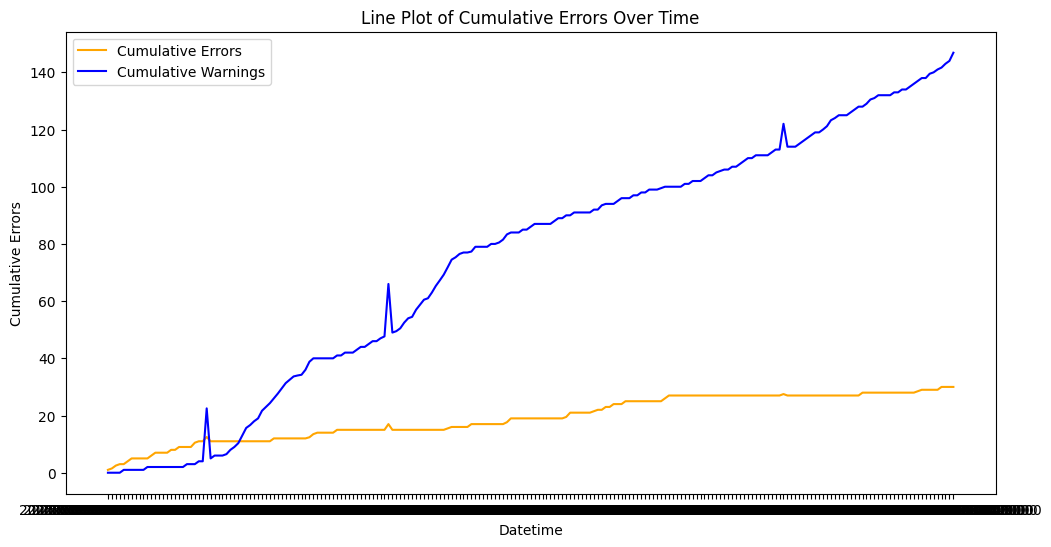

In [90]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=full_df, x='MerDate', y='is_error_cumulative', label='Cumulative Errors', color='orange', ci=None)
sns.lineplot(data=full_df, x='MerDate', y='is_warning_cumulative', label='Cumulative Warnings', color='blue', ci=None)
# sns.lineplot(data=full_df, x='MerDate', y='stop', label='stop', color='red', ci=None)

# Add vertical lines for stops
stop_dates = full_df[full_df['stop'] > 100]['MerDate']
for stop_date in stop_dates:
    plt.axvline(pd.to_datetime(stop_date), color='green', linestyle='--', alpha=0.7, label='Stop')

plt.title('Line Plot of Cumulative Errors Over Time')
plt.xlabel('Datetime')
plt.ylabel('Cumulative Errors')
plt.legend()
plt.show()

# We need to see the active warnings

How to make this in the code?

## I actually want to see the following information:
- time info on the x-axis
- number of active warnings/errors
- stop

In [270]:
df = test.copy()
df = df[(df['index'] > 15000) & (df['index'] < 16000)]

In [271]:
df[df['MerType'] == 8 ]

,index,MerDate,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,MerData5,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Error/warnings,lane_stopping_machine,snapshot,time_delta
15009,15009,2025-01-30 17:49:36,11913249,8,0,3,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,265,0 days 00:00:22
15026,15026,2025-01-30 17:49:52,11913266,8,1,3,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,8_1_0.0_0.0,NaN,265,0 days 00:00:22
15030,15030,2025-01-30 17:50:02,11913271,8,0,3,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,266,0 days 00:04:46
15048,15048,2025-01-30 17:50:06,11913289,8,1,3,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,8_1_0.0_0.0,NaN,266,0 days 00:04:46
15131,15131,2025-01-30 17:54:49,11913388,8,0,2,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,267,0 days 00:00:18
15134,15134,2025-01-30 17:54:50,11913391,8,1,2,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,8_1_0.0_0.0,NaN,267,0 days 00:00:18
15150,15150,2025-01-30 17:55:08,11913407,8,0,2,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,268,0 days 00:00:25
15153,15153,2025-01-30 17:55:09,11913410,8,1,2,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,8_1_0.0_0.0,NaN,268,0 days 00:00:25
15176,15176,2025-01-30 17:55:34,11913434,8,0,2,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,269,0 days 00:03:40
15180,15180,2025-01-30 17:55:35,11913438,8,1,2,0.0,0.0,0.0,NaN,NaN,4620,NaN,0,0,0,8_1_0.0_0.0,NaN,269,0 days 00:03:40


In [272]:
df['stop'] = df.apply(lambda row: row['MerNumber'] if row['MerType'] == 8 else 1, axis=1)

In [273]:
df[df['stop'] == 0]

,index,MerDate,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,...,MerMinId,MerText,MerDeviceType,MerDeviceNumber,MerPriority,Error/warnings,lane_stopping_machine,snapshot,time_delta,stop
15009,15009,2025-01-30 17:49:36,11913249,8,0,3,0.0,0.0,0.0,NaN,...,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,265,0 days 00:00:22,0
15030,15030,2025-01-30 17:50:02,11913271,8,0,3,0.0,0.0,0.0,NaN,...,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,266,0 days 00:04:46,0
15131,15131,2025-01-30 17:54:49,11913388,8,0,2,0.0,0.0,0.0,NaN,...,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,267,0 days 00:00:18,0
15150,15150,2025-01-30 17:55:08,11913407,8,0,2,0.0,0.0,0.0,NaN,...,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,268,0 days 00:00:25,0
15176,15176,2025-01-30 17:55:34,11913434,8,0,2,0.0,0.0,0.0,NaN,...,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,269,0 days 00:03:40,0
15275,15275,2025-01-30 17:59:15,11913545,8,0,2,0.0,0.0,0.0,NaN,...,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,270,0 days 00:00:19,0
15311,15311,2025-01-30 17:59:35,11913581,8,0,2,0.0,0.0,0.0,NaN,...,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,271,0 days 00:01:44,0
15374,15374,2025-01-30 18:01:20,11913646,8,0,2,0.0,0.0,0.0,NaN,...,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,272,0 days 00:00:33,0
15393,15393,2025-01-30 18:01:57,11913669,8,0,3,0.0,0.0,0.0,NaN,...,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,273,0 days 00:02:15,0
15509,15509,2025-01-30 18:04:15,11913792,8,0,2,0.0,0.0,0.0,NaN,...,4620,NaN,0,0,0,8_0_0.0_0.0,NaN,274,0 days 00:00:08,0


In [274]:
import pandas as pd

# Create a match key
df['match_key'] = list(zip(df['MerNumber'], df['MerSubNumber']))

# Initialize the unresolved column
df['unresolved_warn'] = pd.NA
df['unresolved_err'] = pd.NA


# Separate warnings and resolutions
warnings = df[df['MerType'].isin([22])].copy()
errors = df[df['MerType'].isin([21])].copy()
resolutions = df[df['MerType'].isin([23, 24])].copy()

# Track used resolutions
used_resolutions = set()

# Match warnings with resolutions
for idx, warn in warnings.iterrows():
    match = resolutions[
        (resolutions['match_key'] == warn['match_key']) &
        (resolutions['MerDate'] > warn['MerDate']) &
        (~resolutions.index.isin(used_resolutions))
    ]
    if not match.empty:
        res_idx = match.index[0]
        used_resolutions.add(res_idx)
        df.at[idx, 'unresolved_warn'] = 0
    else:
        df.at[idx, 'unresolved_warn'] = 1

# Match warnings with resolutions
for idx, err in errors.iterrows():
    match = resolutions[
        (resolutions['match_key'] == err['match_key']) &
        (resolutions['MerDate'] > err['MerDate']) &
        (~resolutions.index.isin(used_resolutions))
    ]
    if not match.empty:
        res_idx = match.index[0]
        used_resolutions.add(res_idx)
        df.at[idx, 'unresolved_err'] = 0
    else:
        df.at[idx, 'unresolved_err'] = 1

# Display the updated DataFrame
display(df)

,index,MerDate,MerId,MerType,MerNumber,MerSubNumber,MerData1,MerData2,MerData3,MerData4,...,MerDeviceNumber,MerPriority,Error/warnings,lane_stopping_machine,snapshot,time_delta,stop,match_key,unresolved_warn,unresolved_err
15001,15001,2025-01-30 17:49:31,11913241,22,98,5,3.0,0.0,0.0,NaN,...,0,0,22_98_0.0_0.0,NaN,264,0 days 00:00:42,1,"(98, 5)",0,<NA>
15002,15002,2025-01-30 17:49:31,11913242,23,98,5,0.0,0.0,0.0,NaN,...,0,0,23_98_0.0_0.0,NaN,264,0 days 00:00:42,1,"(98, 5)",<NA>,<NA>
15003,15003,2025-01-30 17:49:31,11913243,22,98,5,3.0,0.0,0.0,NaN,...,0,0,22_98_0.0_0.0,NaN,264,0 days 00:00:42,1,"(98, 5)",0,<NA>
15004,15004,2025-01-30 17:49:31,11913244,23,98,5,0.0,0.0,0.0,NaN,...,0,0,23_98_0.0_0.0,NaN,264,0 days 00:00:42,1,"(98, 5)",<NA>,<NA>
15005,15005,2025-01-30 17:49:31,11913245,22,98,16,3.0,0.0,0.0,NaN,...,0,0,22_98_0.0_0.0,NaN,264,0 days 00:00:42,1,"(98, 16)",0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,2025-01-30 18:09:36,11914289,23,98,15,0.0,0.0,0.0,NaN,...,0,0,23_98_0.0_0.0,NaN,280,0 days 00:00:30,1,"(98, 15)",<NA>,<NA>
15996,15996,2025-01-30 18:09:37,11914290,22,98,15,2.0,0.0,0.0,NaN,...,0,0,22_98_0.0_0.0,NaN,280,0 days 00:00:30,1,"(98, 15)",1,<NA>
15997,15997,2025-01-30 18:09:37,11914291,23,98,17,0.0,0.0,0.0,NaN,...,0,0,23_98_0.0_0.0,NaN,280,0 days 00:00:30,1,"(98, 17)",<NA>,<NA>
15998,15998,2025-01-30 18:09:38,11914292,22,98,17,3.0,0.0,0.0,NaN,...,0,0,22_98_0.0_0.0,NaN,280,0 days 00:00:30,1,"(98, 17)",1,<NA>


In [275]:
df['stop'].value_counts()

stop
1    983
0     16
Name: count, dtype: int64

In [276]:
# import pandas as pd

# df = active_errors
# # Create a match key
# df['match_key'] = list(zip(df['MerNumber'], df['MerSubNumber']))

# # Initialize the resolved column
# df['unresolved'] = pd.NA

# warnings = df[df['MerType'] == 22].copy()
# resolutions = df[df['MerType'] == 23].copy()

# used_resolutions = set()
# for idx, warn in warnings.iterrows():
#     match = resolutions[
#         (resolutions['match_key'] == warn['match_key']) &
#         (resolutions['MerDate'] > warn['MerDate']) &
#         (~resolutions.index.isin(used_resolutions))
#     ]
#     if not match.empty:
#         res_idx = match.index[0]
#         used_resolutions.add(res_idx)
#         df.at[idx, 'unresolved'] = 0
#     else:
#         df.at[idx, 'unresolved'] = 1

# display(df)


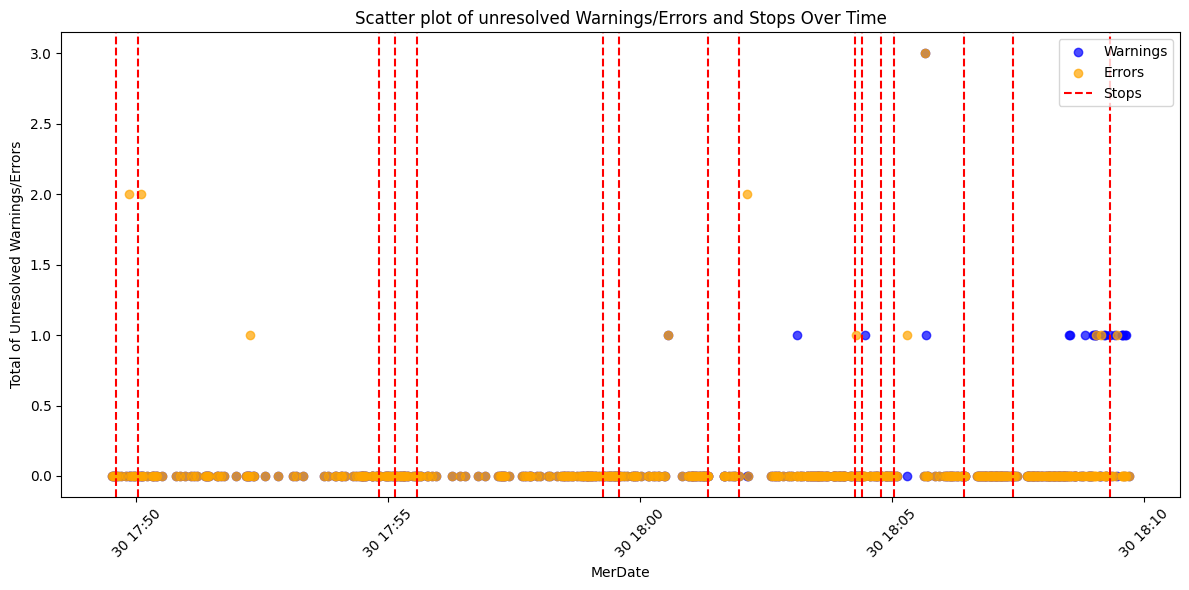

In [277]:
import matplotlib.pyplot as plt
import pandas as pd


# Group data by MerDate and count unresolved warnings
scatter_data = df.groupby('MerDate').agg({
    'unresolved_warn': 'sum',
    'unresolved_err': 'sum'
}).reset_index()

# Convert MerDate to datetime for proper plotting
scatter_data['MerDate'] = pd.to_datetime(scatter_data['MerDate'])

# Create scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(scatter_data['MerDate'], scatter_data['unresolved_warn'], label='Warnings', color='blue', alpha=0.7)
plt.scatter(scatter_data['MerDate'], scatter_data['unresolved_err'], label='Errors', color='orange', alpha=0.7)


# Highlight stops with vertical lines
stop_data = df[df['stop'] == 0]
for i, stop_date in enumerate(pd.to_datetime(stop_data['MerDate'])):
    plt.axvline(stop_date, color='red', linestyle='--', label='Stops' if i == 0 else "")

# Final plot formatting
plt.title('Scatter plot of unresolved Warnings/Errors and Stops Over Time')
plt.xlabel('MerDate')
plt.ylabel('Total of Unresolved Warnings/Errors')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
